# E2a: Küchentischversuch zum Laval-Rotor

Name:  __Tahsin Ahmad__

Datum: __21.12.2023__ 

## Forschungsfrage

__Wie sind die Vibrationen des Stabmixers und der elektrischen Zahnbürste zu verstehen__
__und welche Schlussfolgerungen lassen sich daraus ziehen?__

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:
- Beschreibung des Aufbaus:
- Vorgangsbeschreibung:

__Das gemessene Objekt ist ein Stabmixer der Firma Grundig. Der Beschleunigungssensor wurde mithilfe von durchsichtigem Klebeband sicher auf der Maschine befestigt. Vor Beginn der Messung habe ich auch die Ein/Aus-Taste der Maschine mit Klebeband in die An-Position fixiert.__

__Während der gesamten Messung wurde die Maschine nicht berührt, um jegliche externe Einflüsse auf die Beschleunigungsdaten zu minimieren. Dies stellt sicher, dass die aufgezeichneten Werte ausschließlich die durch die Maschine erzeugten Beschleunigungen widerspiegeln.__

<img src="data/images/g1.jpg" width="1600">

<img src="data/images/g2.jpg" width="800">


## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [6]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [7]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "data/data_20231221_122414_Tahsin_Ahmad_Stabmixer" # path to my measurement folder
h5_file_name = "data_20231221_122414_Tahsin_Ahmad_Stabmixer.h5" # h5 file for the first measurement
# ---------------------------------------------------------------------------------------------#1-end

In [8]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(path_measurement_folder)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))

{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "data/data_20231221_122414_Tahsin_Ahmad_Stabmixer/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "data/data_20231221_122414_Tahsin_Ahmad_Stabmixer/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "m/s\u00b2"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "data/data_20231221_122414_Tahsin_Ahmad_Stabmixer/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "9ac9d64b-3c2e-4e85-86b4-7e1a90b6a887": {
    "type": "probe",
    "name": "Stabmixer",
    "comment": "",
    "path": "data/data_20231221_122414_Tahsin_Ahmad_Stabmixer/9

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [9]:
h5_file_path = os.path.join(path_measurement_folder, h5_file_name) # for path using the above defined variables
with h5py.File(h5_file_path, "r") as h5_file:
    # reading data
    acceleration_x = np.array(h5_file["acceleration_x"]) # reading x
    acceleration_y = np.array(h5_file["acceleration_y"]) # reading y
    acceleration_z = np.array(h5_file["acceleration_z"]) # reading z
    timestamp = np.array(h5_file["timestamp"]) # reading timestamp

# Printing the data 
print("Acceleration X:", acceleration_x)
print("Acceleration Y:", acceleration_y)
print("Acceleration Z:", acceleration_z)
print("Timestamp:", timestamp)
# checking their length just to be sure
print("Size of acceleration_x array:", len(acceleration_x))
print("Size of acceleration_y array:", len(acceleration_y))
print("Size of acceleration_z array:", len(acceleration_z))
print("Size of timestamp array:", len(timestamp))

Acceleration X: [-5.9232166 -5.9232166 -5.9232166 ... -7.2176944 -7.2176944 -7.2176944]
Acceleration Y: [13.0232312 13.0232312 13.0232312 ... 14.513842  14.513842  14.513842 ]
Acceleration Z: [-1.96133   -1.96133   -1.96133   ...  3.4519408  3.4519408  3.4519408]
Timestamp: [1.02806091e-03 5.98430634e-03 8.99291039e-03 ... 1.99951000e+01
 1.99980230e+01 2.00010002e+01]
Size of acceleration_x array: 5345
Size of acceleration_y array: 5345
Size of acceleration_z array: 5345
Size of timestamp array: 5345


#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [10]:
betr = get_vec_accel(acceleration_x, acceleration_y, acceleration_z) # betrag
print(betr)
# again checking length to make sure the value matches with the the values above
print ("betr has", len(betr),"values")

[14.44077079 14.44077079 14.44077079 ... 16.57294836 16.57294836
 16.57294836]
betr has 5345 values


#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


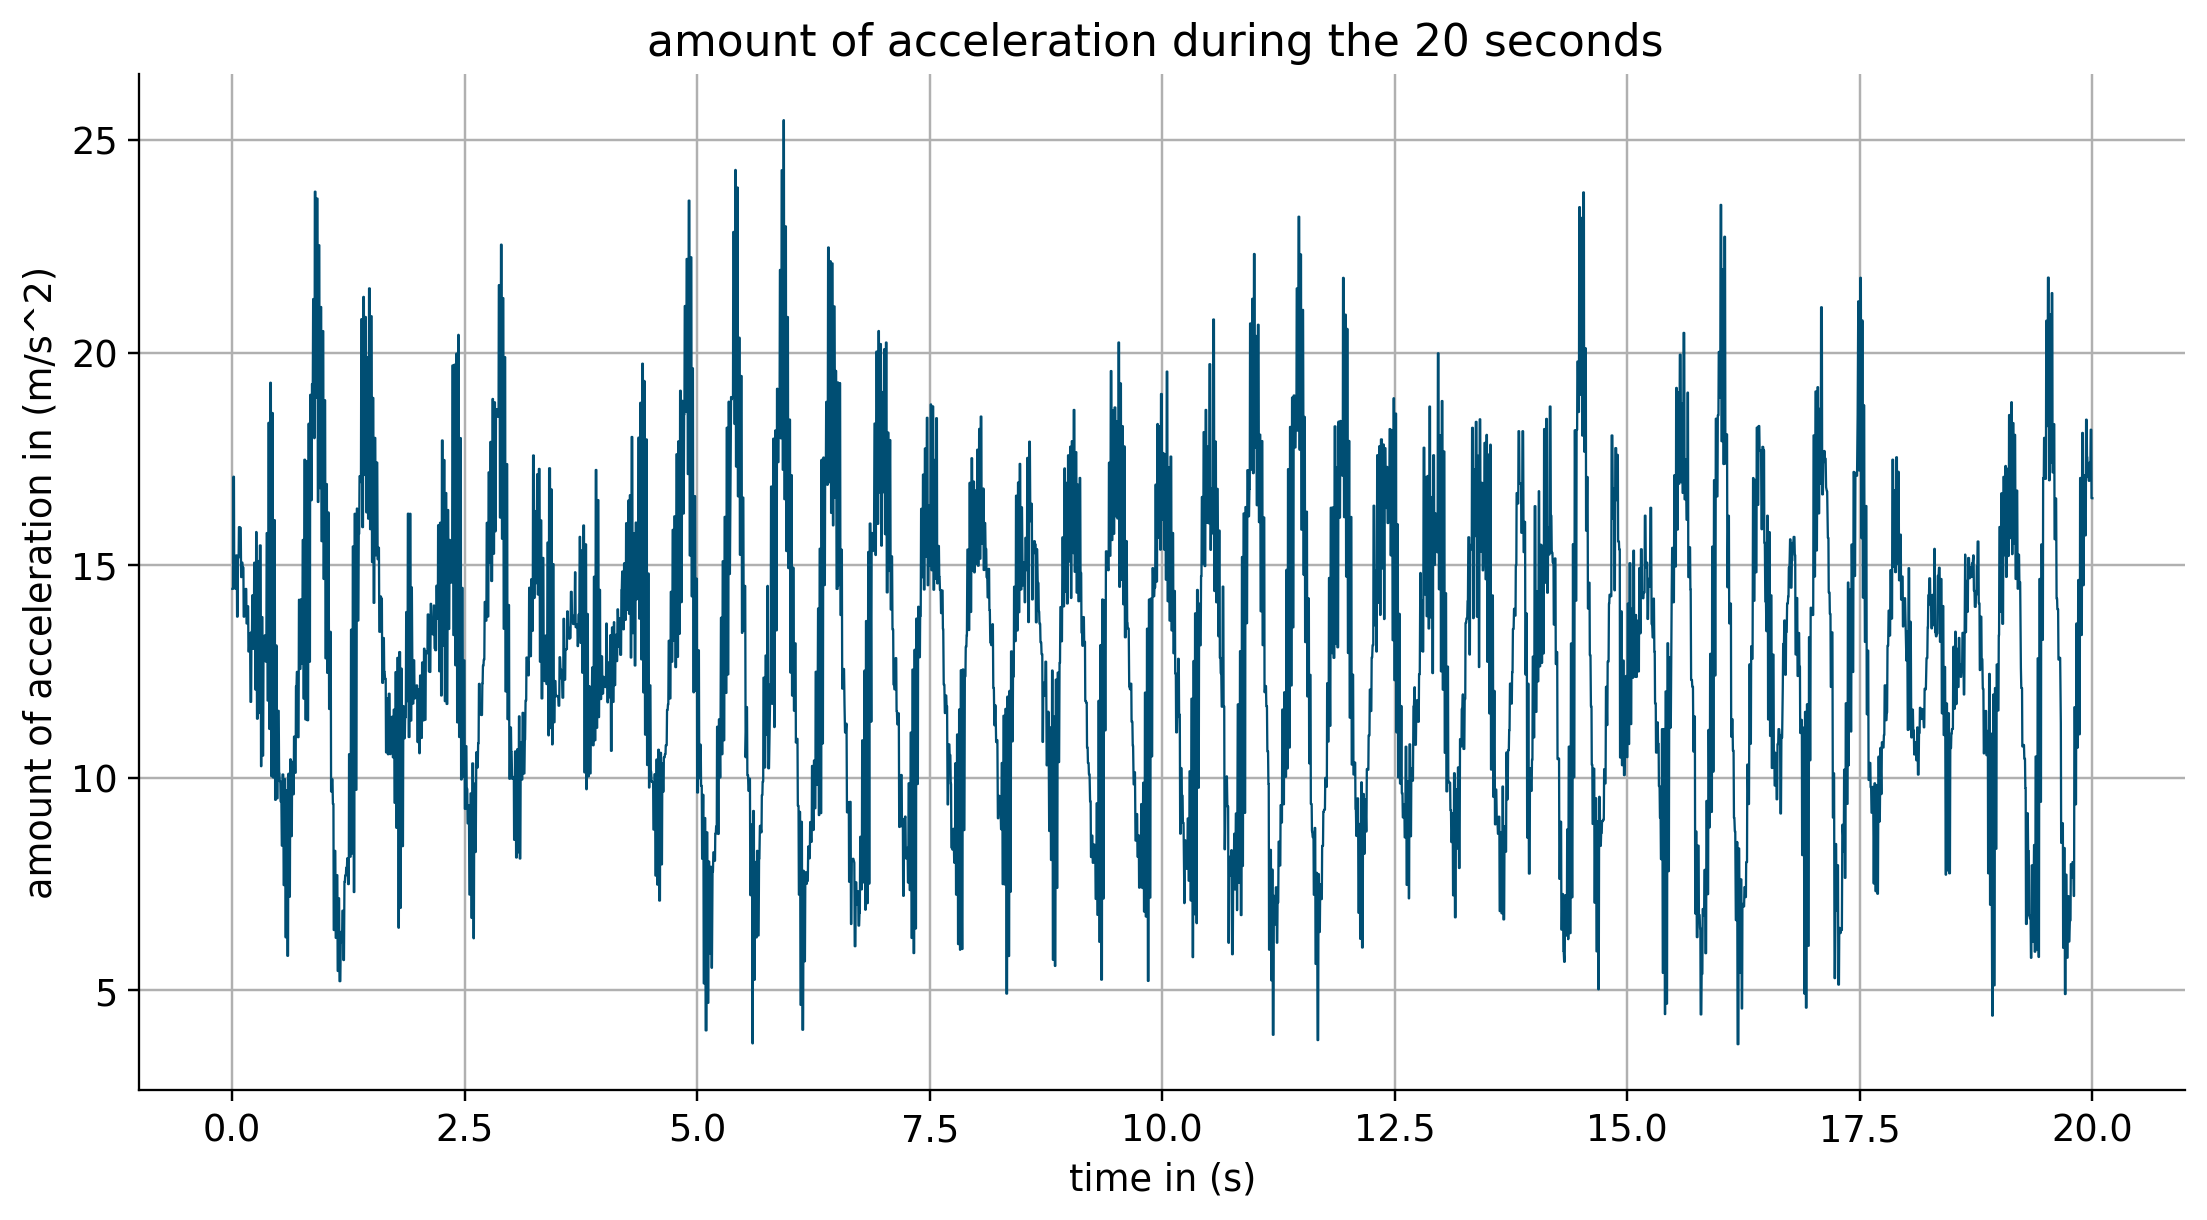

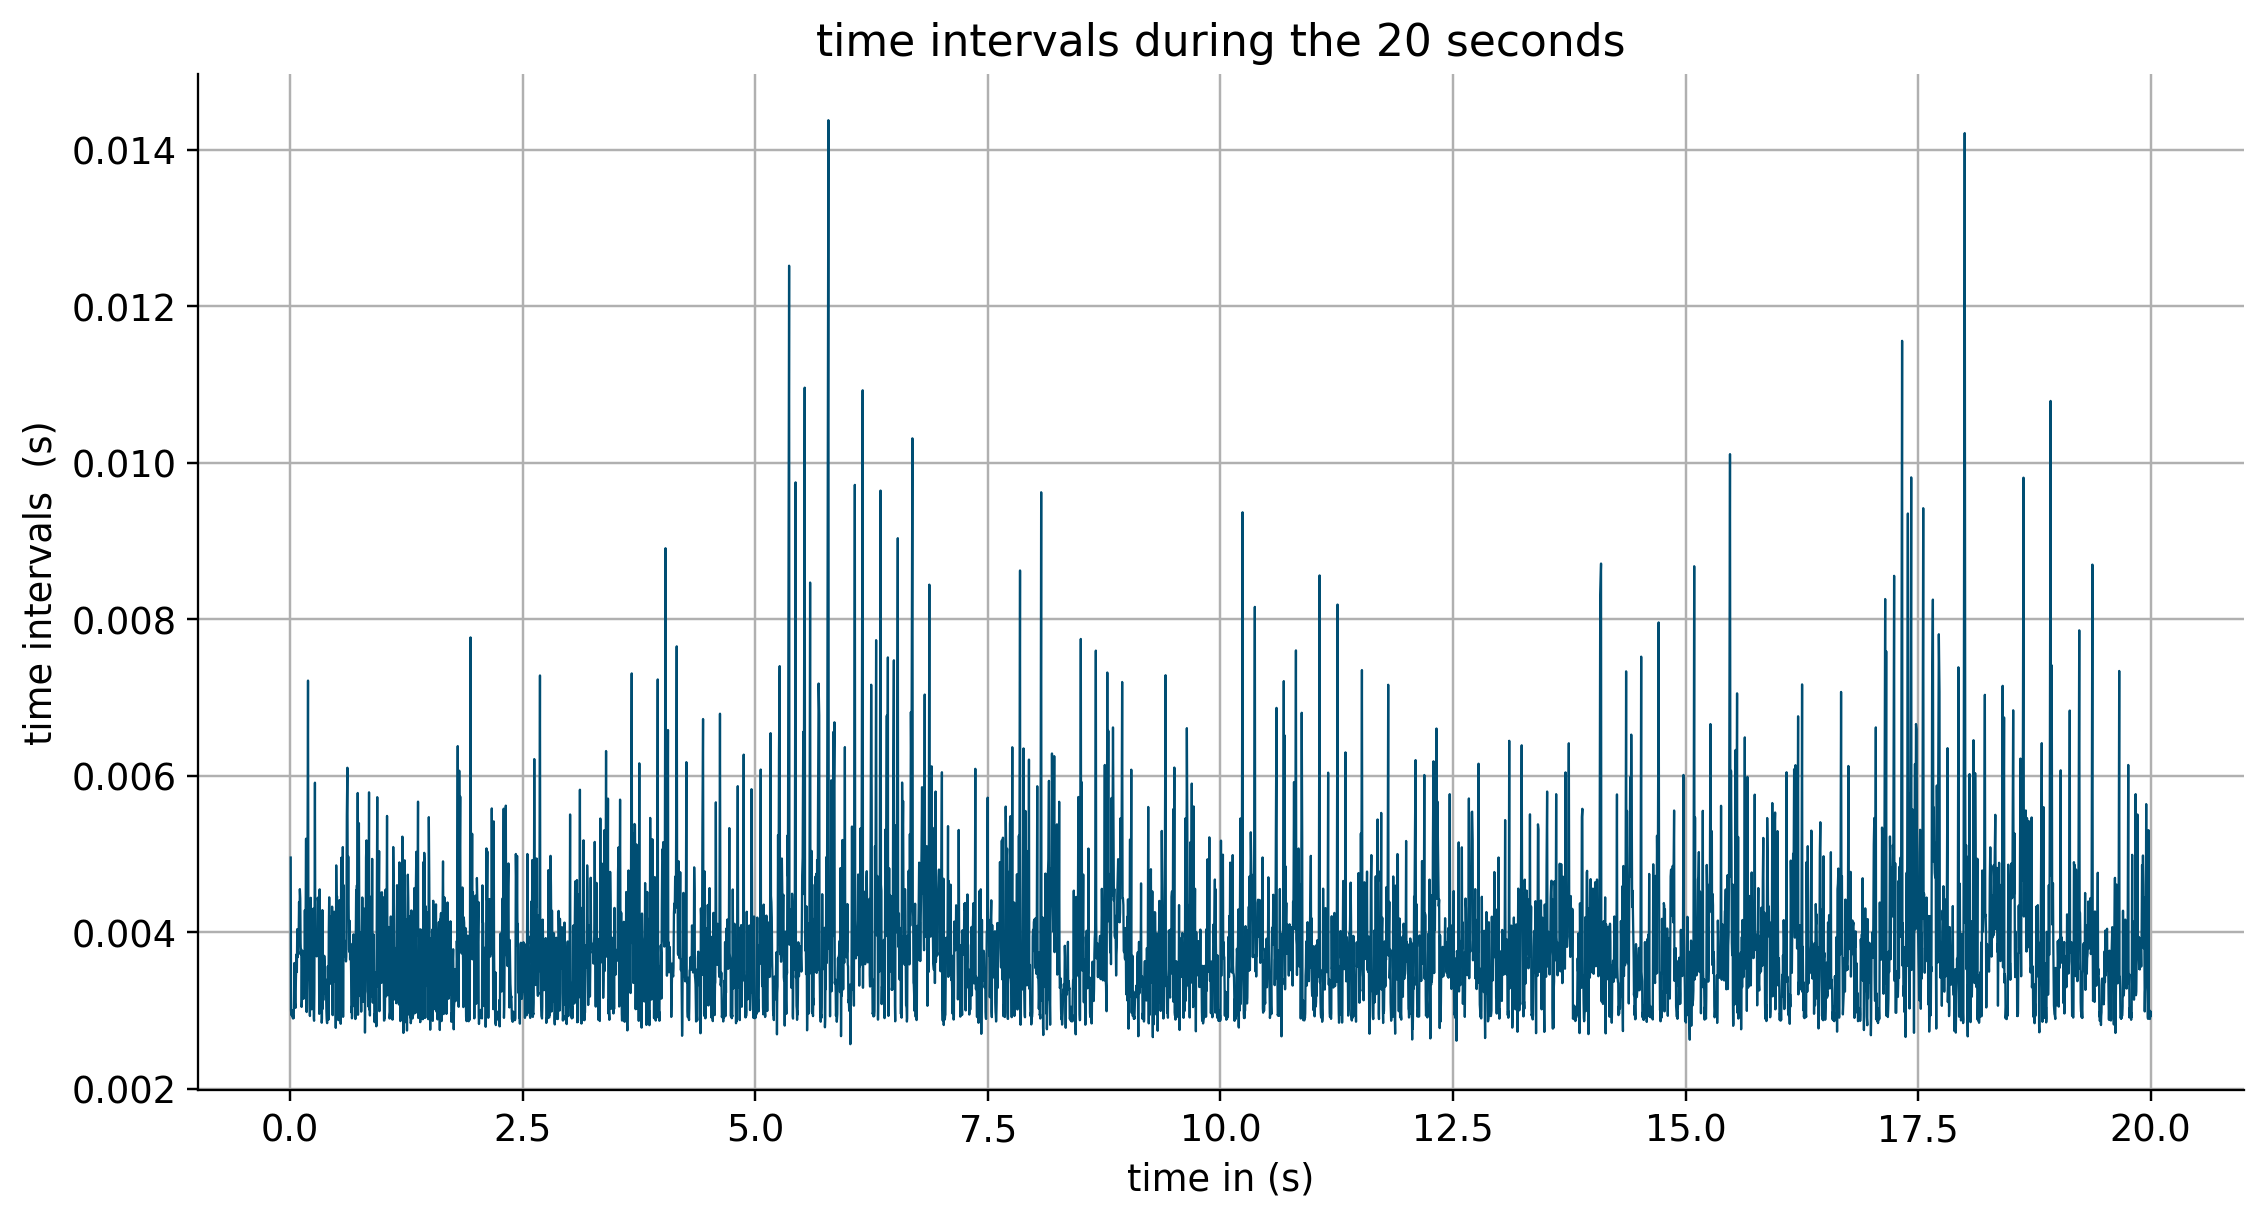

In [11]:
time_intervals = np.diff(timestamp) # time intervals in timestamp data
plt.figure(figsize=(12, 6)) # size of graph
plt.plot(timestamp, betr) # plot data
plt.xlabel('time in (s)') # label for x axis
plt.ylabel('amount of acceleration in (m/s^2)') # label for y axis
plt.title('amount of acceleration during the 20 seconds ') # title of the graph

plt.grid(True) # grid showing for better readablity
plt.show()

# second graph for time intervals
plt.figure(figsize=(12, 6)) # size of graph
plt.plot(timestamp[1:], time_intervals) # plot data
plt.xlabel('time in (s)') # label for x axis
plt.ylabel('time intervals  (s)') # label for y axis
plt.title('time intervals during the 20 seconds') # title of the graph
plt.grid(True) # grid showing for better readablity
plt.show()

#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [12]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the acceleration.
t_interp, data_interp = interpolation(timestamp, betr) 
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

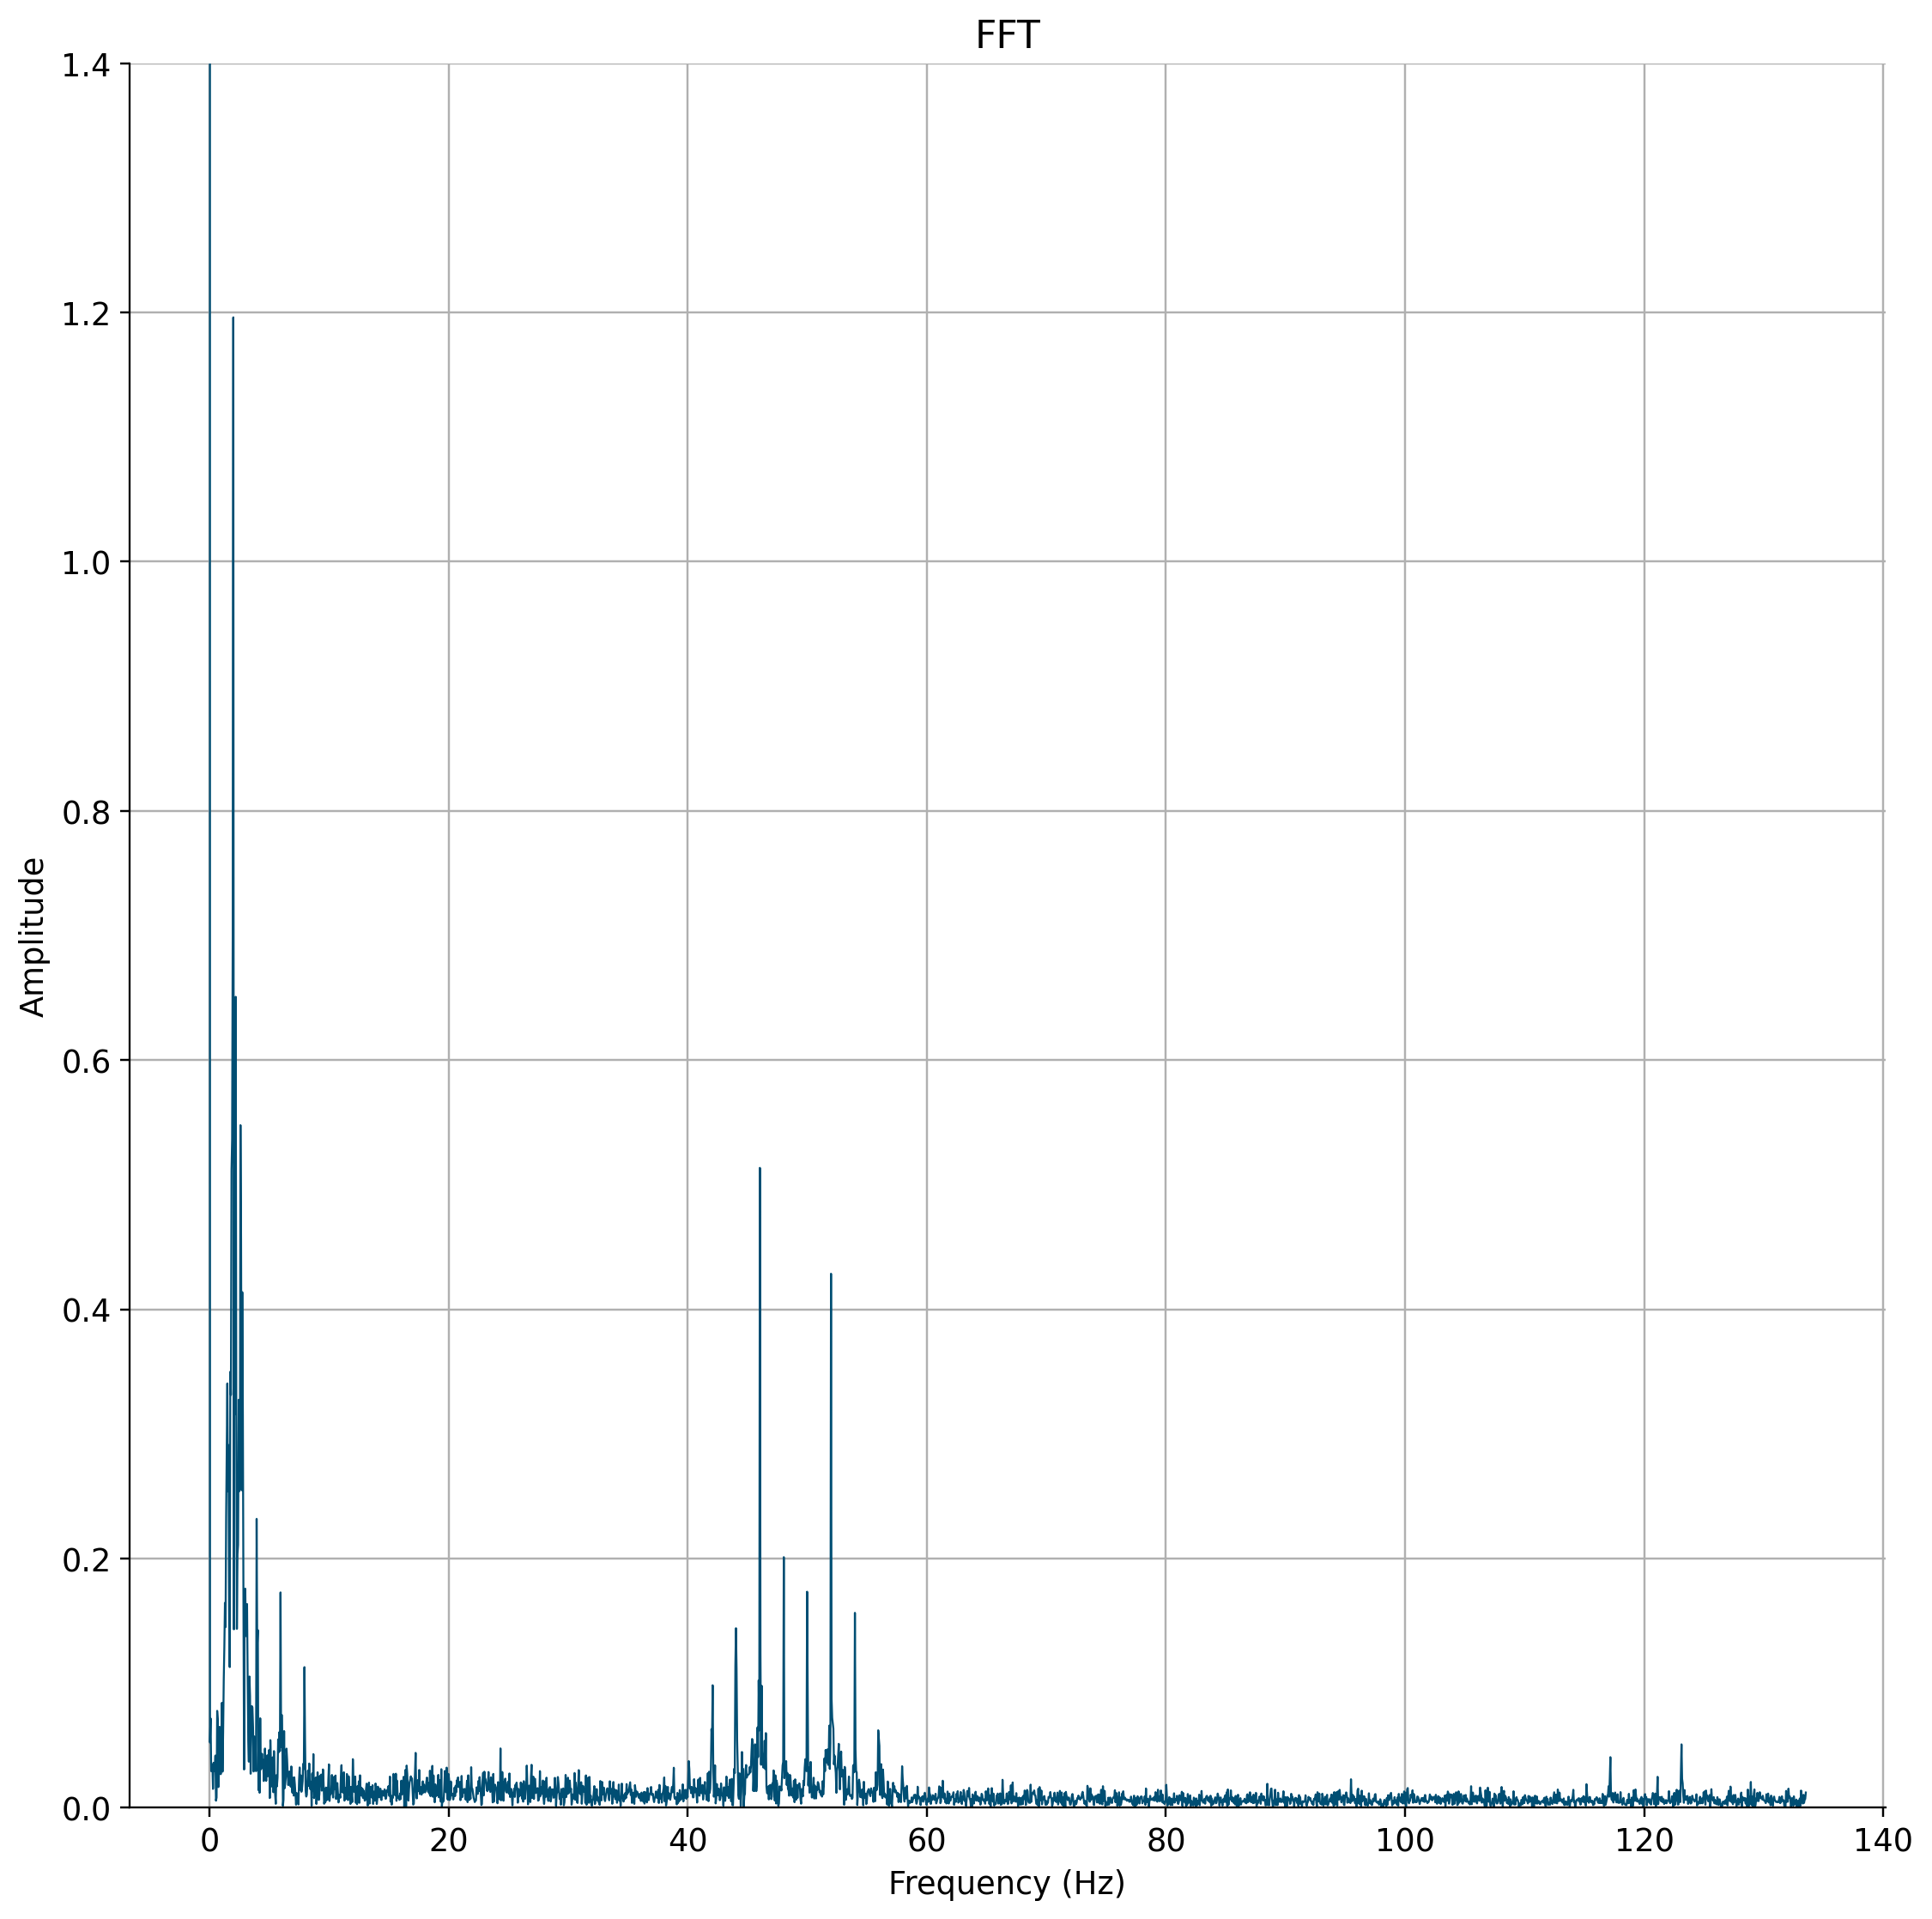

In [13]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results
amplitude, frequency = my_fft(data_interp, t_interp) # fft 
plt.figure(figsize=(12, 12)) # graph size
plt.ylim(0, 1.4)  # limiting the y axis to 1.4 for better readability of graph
plt.plot(frequency, amplitude)
plt.xlabel('Frequency (Hz)') # label for x axis
plt.ylabel('Amplitude') # label for y axis
plt.title('FFT') # plot title
plt.grid(True) # grid on
plt.show()
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:
- Beschreibung des Aufbaus:
- Vorgangsbeschreibung:

__Das gemessene Objekt ist eine Zahnbürste der Firma Oral-B. Der Beschleunigungssensor wurde mithilfe von durchsichtigem Klebeband sicher auf die Bürste befestigt. Vor Beginn der Messung habe ich die Zahnbürste eingeschaltet.__
__Während der gesamten Messung wurde die Bürste nicht berührt, um jegliche externe Einflüsse auf die Beschleunigungsdaten zu minimieren. Dies stellt sicher, dass die aufgezeichneten Werte ausschließlich die durch die Maschine erzeugten Beschleunigungen widerspiegeln.__

<img src="data/images/z1.jpg" width="1600">

<img src="data/images/z2.jpg" width="1600">

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [14]:
path_measurement_folder2 = "data/data_20231221_123850_Tahsin_Ahmad_Zahnbürste" # path folder of my second object
h5_file_name2 = "data_20231221_123850_Tahsin_Ahmad_Zahnbürste.h5" # h5 file for second object

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [15]:
h5_file_path = os.path.join(path_measurement_folder2, h5_file_name2) # getting path by above defined variables
with h5py.File(h5_file_path, "r") as h5_file:
    # reading data from the h5 file for x-y-z and timestamp
    acceleration_x2 = np.array(h5_file["acceleration_x"])
    acceleration_y2 = np.array(h5_file["acceleration_y"])
    acceleration_z2 = np.array(h5_file["acceleration_z"])
    timestamp2 = np.array(h5_file["timestamp"])

# Printing the data and checking their length 
print("Acceleration X:", acceleration_x2)
print("Acceleration Y:", acceleration_y2)
print("Acceleration Z:", acceleration_z2)
print("Timestamp:", timestamp2)
print("Size of acceleration_x array:", len(acceleration_x2))
print("Size of acceleration_y array:", len(acceleration_y2))
print("Size of acceleration_z array:", len(acceleration_z2))
print("Size of timestamp array:", len(timestamp2))

Acceleration X: [ 1.4121576  1.4121576 -2.8635418 ... -1.569064  -1.569064  -3.2558078]
Acceleration Y: [-1.765197  -1.765197  -1.6867438 ... -4.4326058 -4.4326058 -0.5099458]
Acceleration Z: [-10.6696352 -10.6696352  -9.2967042 ...  -9.80665    -9.80665
  -9.6889702]
Timestamp: [9.84668732e-04 4.47988510e-03 7.08603859e-03 ... 1.99922931e+01
 1.99957871e+01 1.99992020e+01]
Size of acceleration_x array: 5391
Size of acceleration_y array: 5391
Size of acceleration_z array: 5391
Size of timestamp array: 5391


#### 2. Betrag der Beschleunigung berechnen


In [16]:
betr2 = get_vec_accel(acceleration_x2, acceleration_y2, acceleration_z2) # amount of acceleration
print(betr2)
print ("betr2 has", len(betr2),"values") # again checking length for comparison

[10.90647628 10.90647628  9.87287624 ... 10.87567654 10.87567654
 10.23408387]
betr2 has 5391 values


#### 3. Darstellung der Messdaten

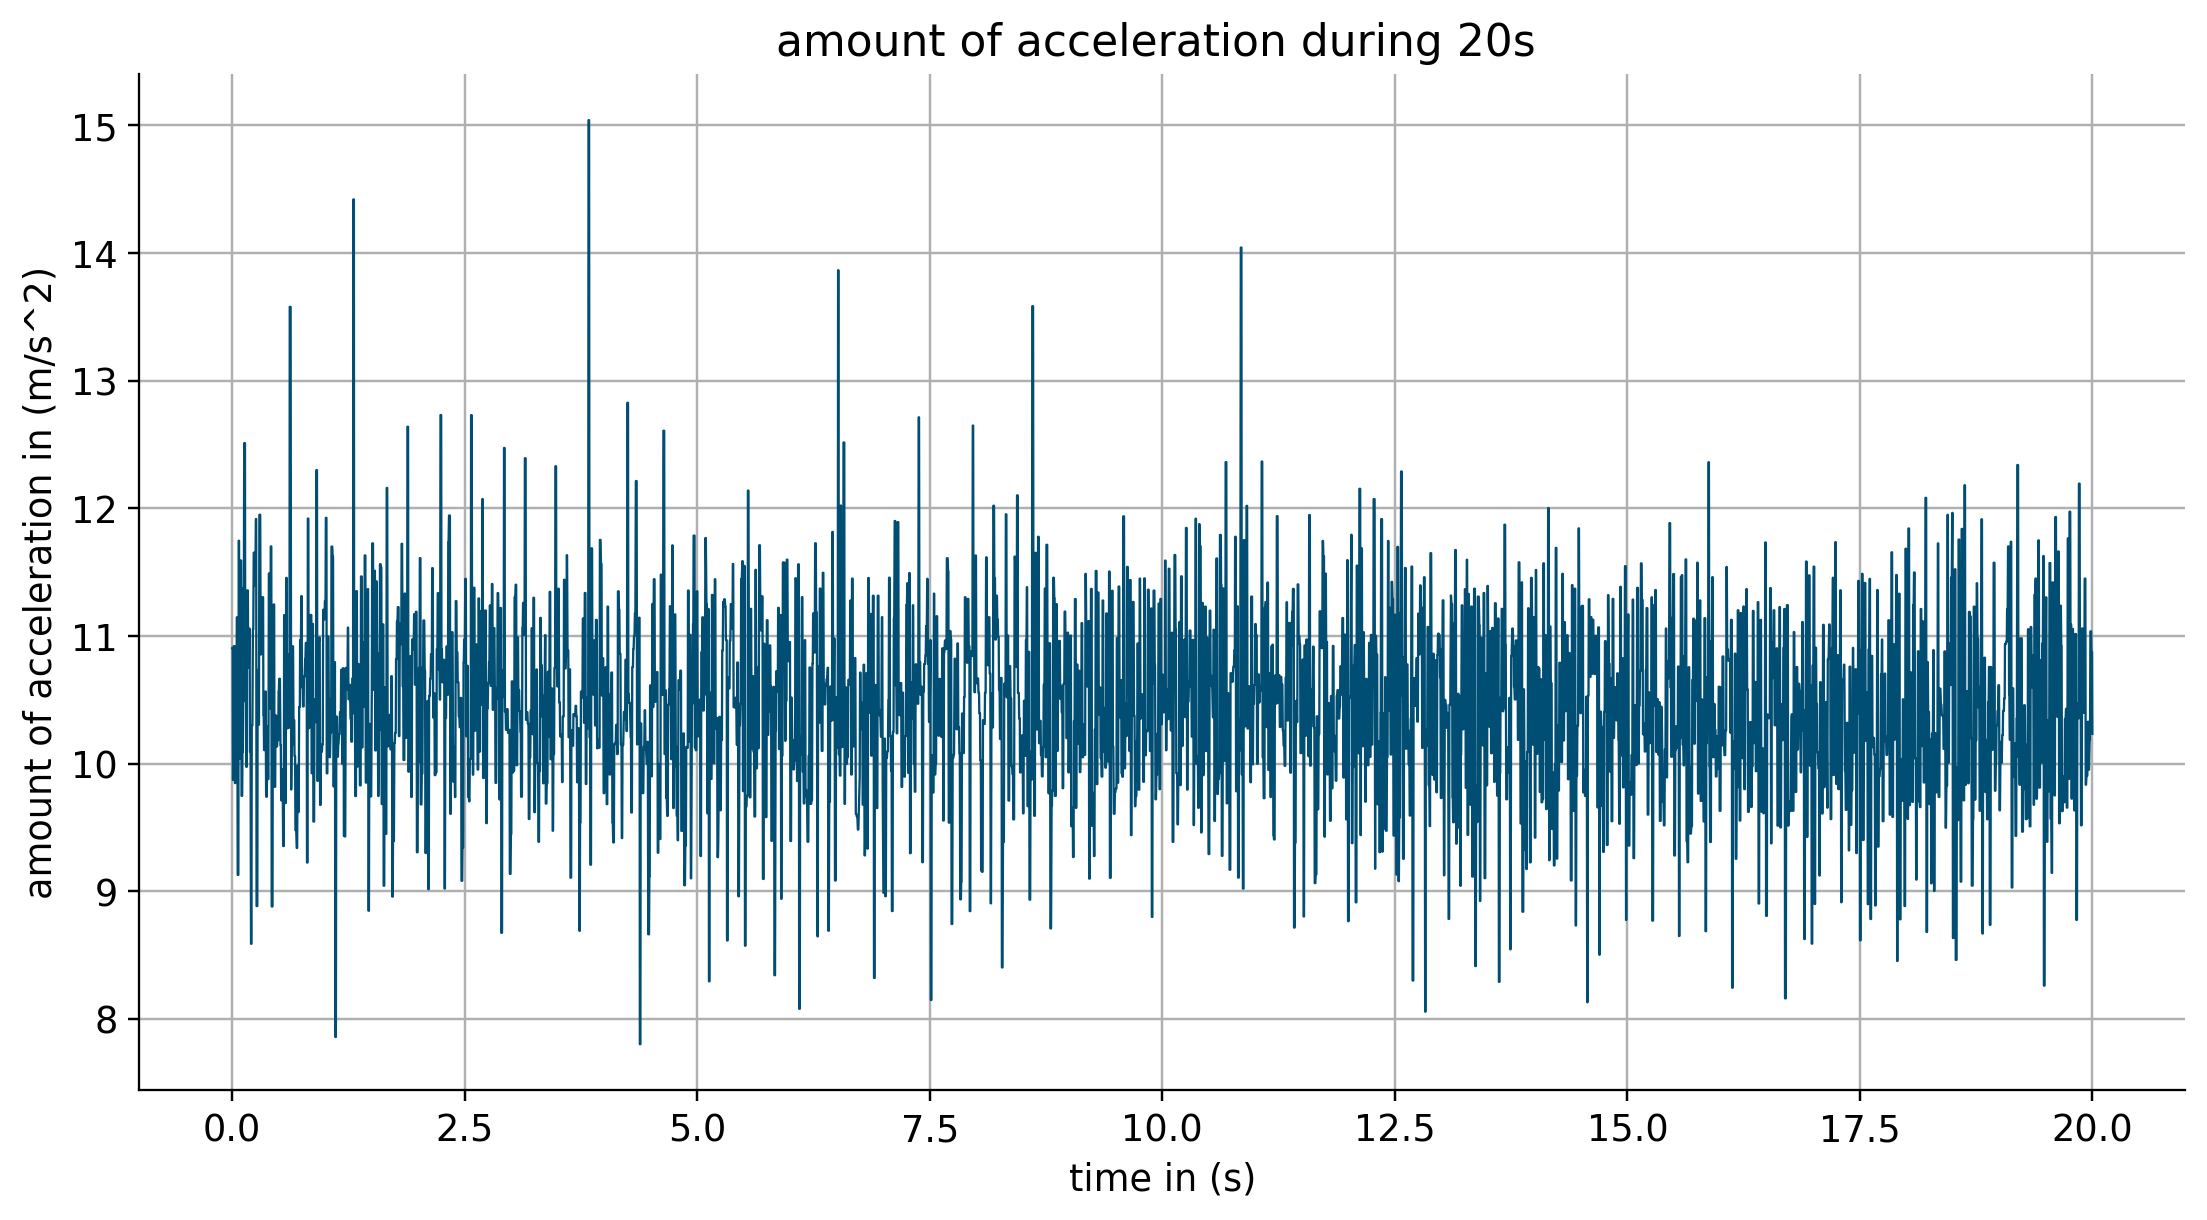

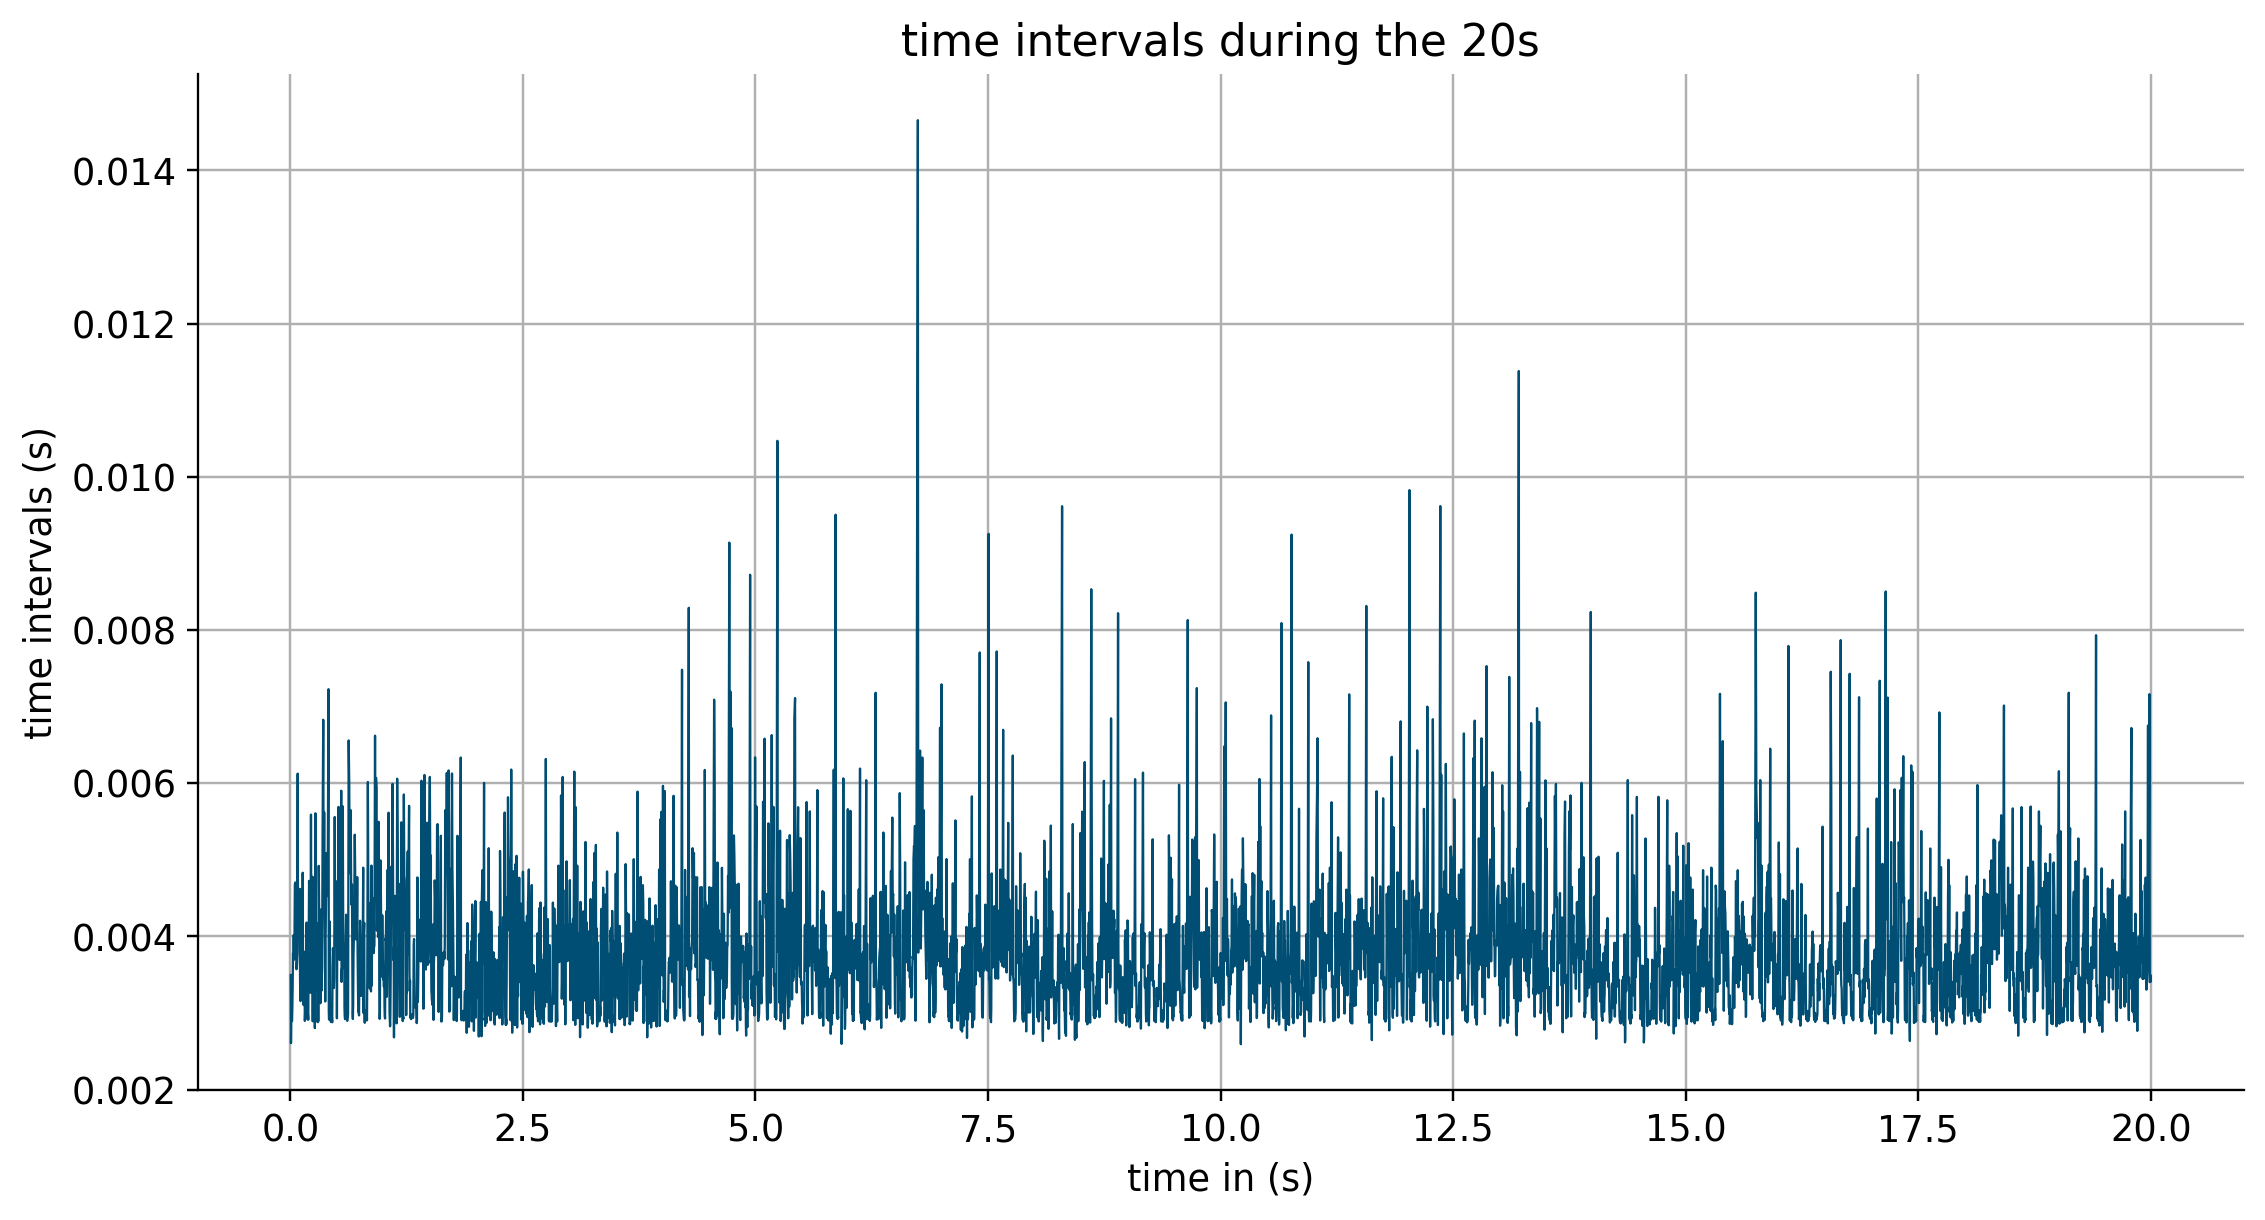

In [17]:
# doing the same procedure for the graphs of second object as for the first one above
time_intervals2 = np.diff(timestamp2) 
plt.figure(figsize=(12, 6)) 
plt.plot(timestamp2, betr2)
plt.xlabel('time in (s)')
plt.ylabel('amount of acceleration in (m/s^2)')
plt.title('amount of acceleration during 20s ')

plt.grid(True)
plt.show()

#second graph
plt.figure(figsize=(12, 6))
plt.plot(timestamp2[1:], time_intervals2)
plt.xlabel('time in (s)')
plt.ylabel('time intervals (s)')
plt.title('time intervals during the 20s')
plt.grid(True)
plt.show()

#### 4. Interpolation der Messwerte



In [18]:
t_interp2, data_interp2 = interpolation(timestamp2, betr2)

#### 5 & 6. FFT durchführen und graphisch darstellen


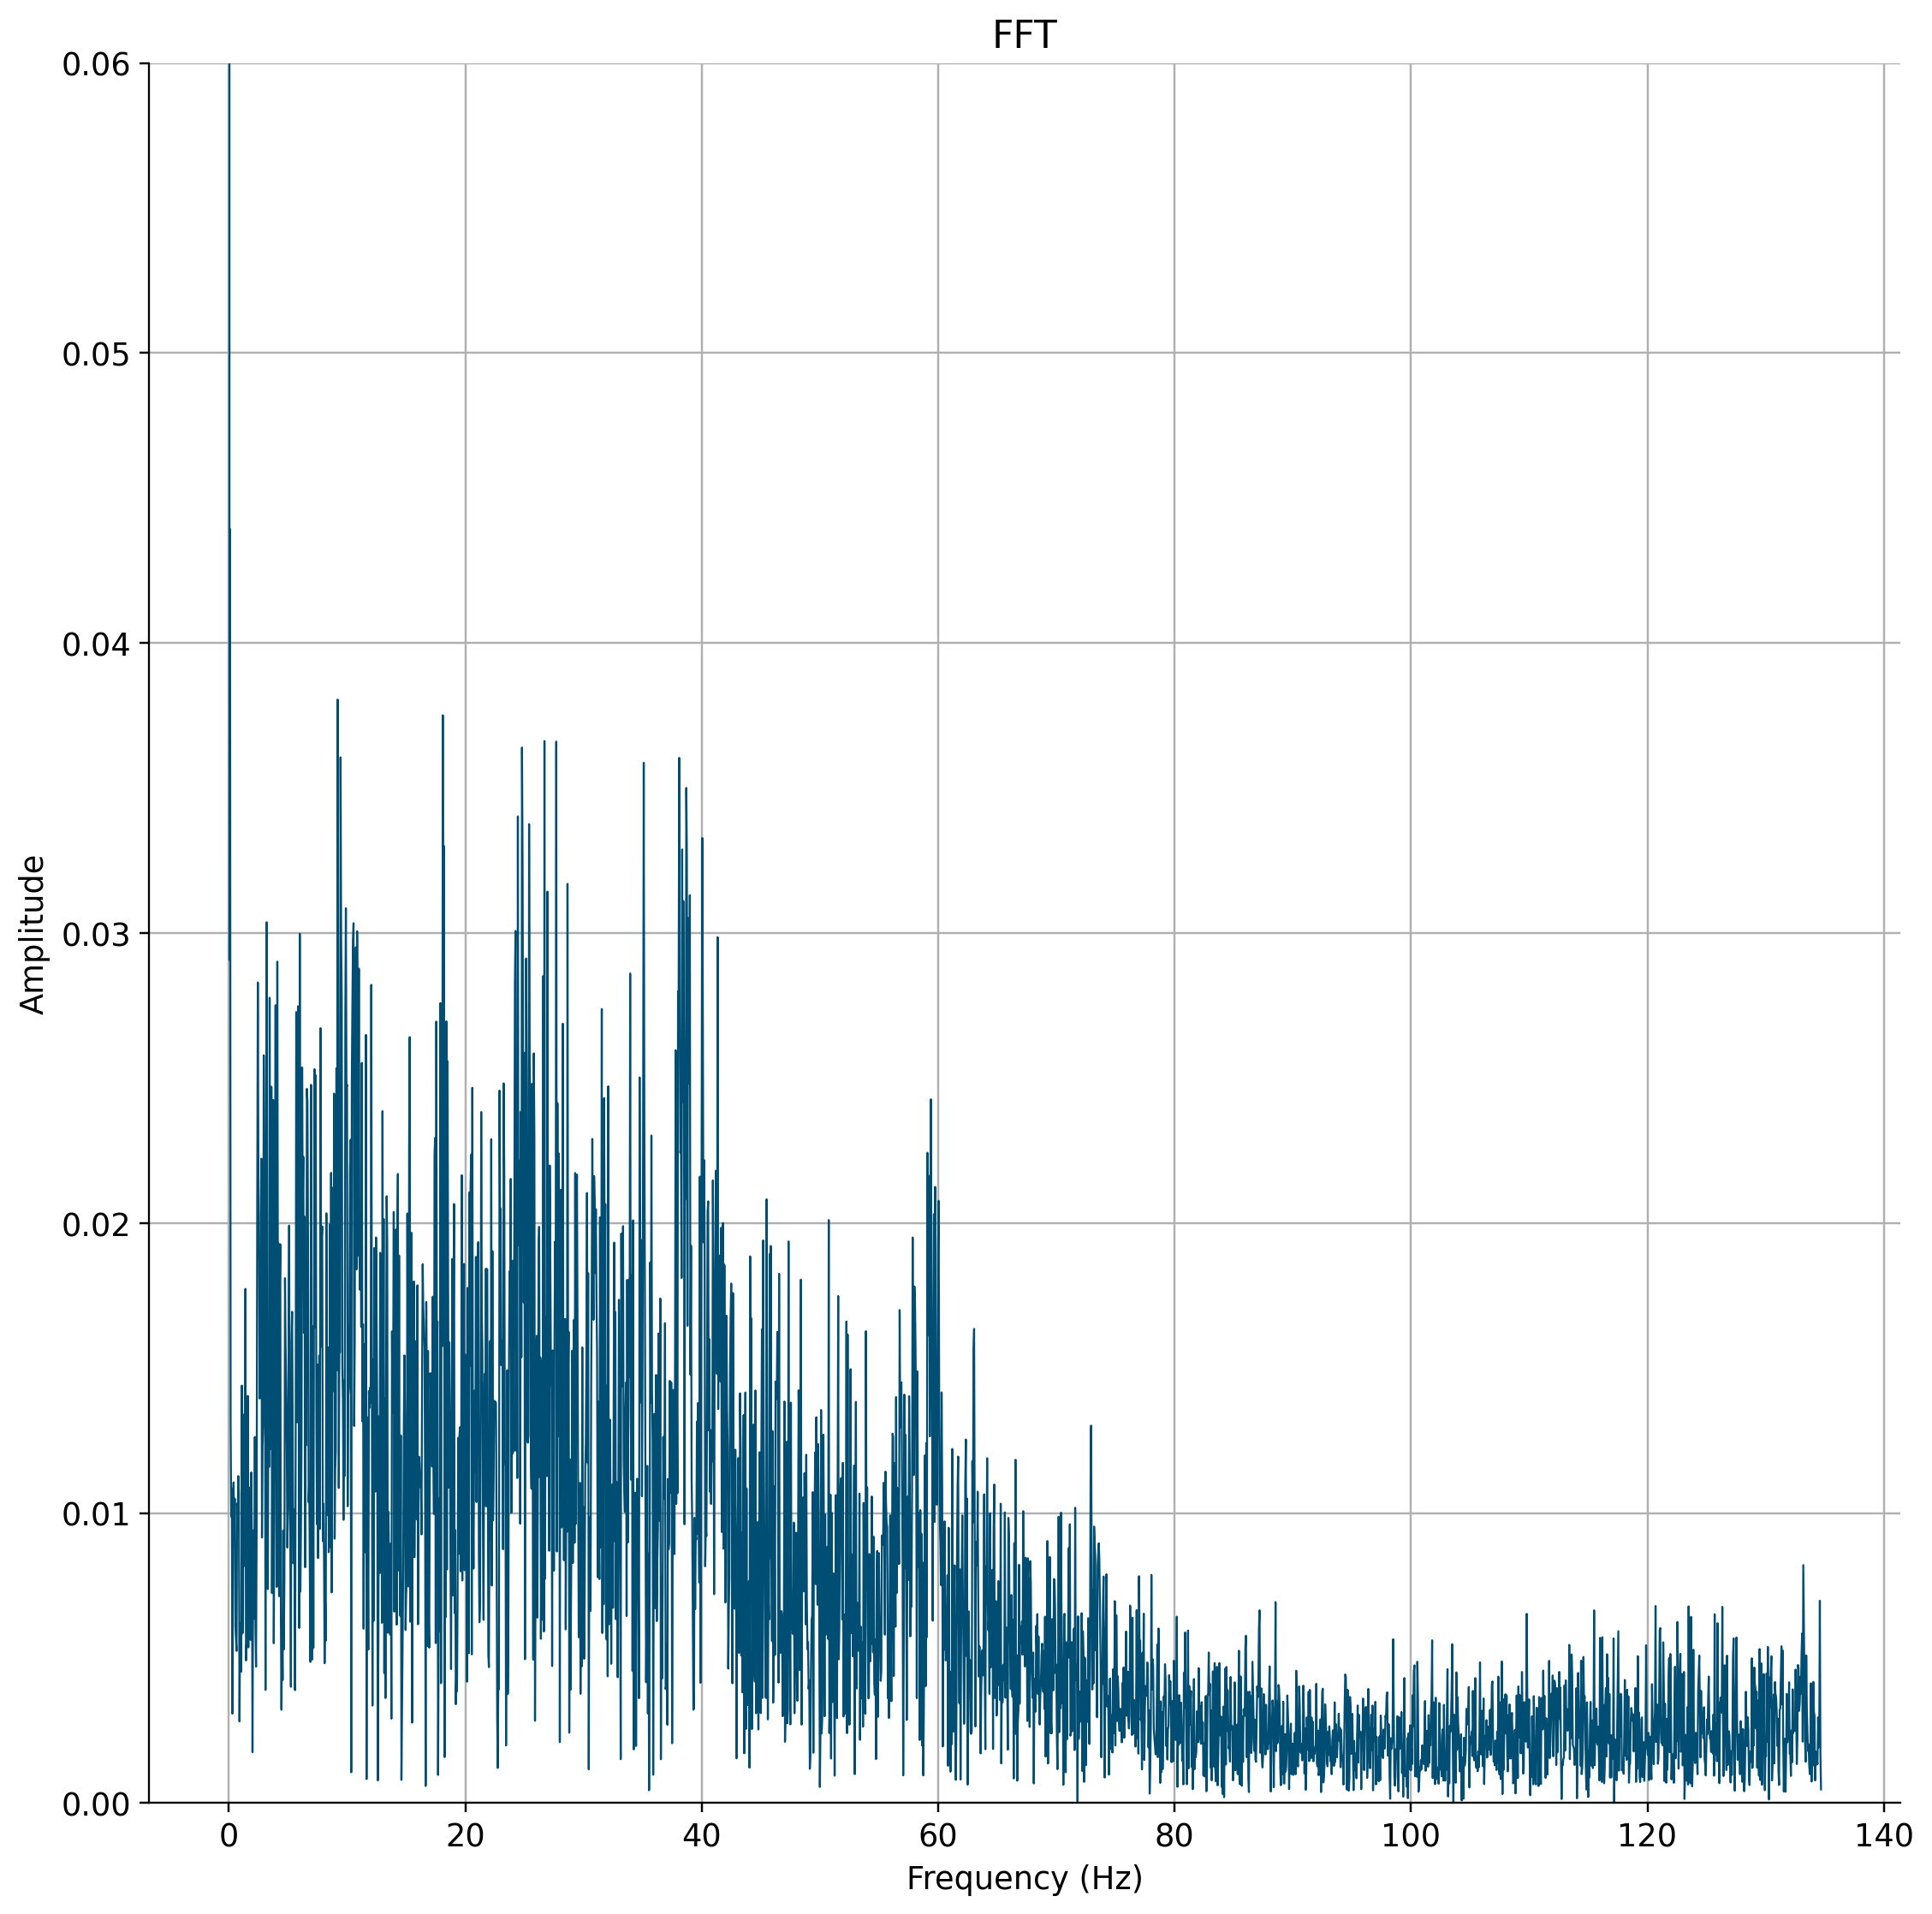

In [19]:
# doing the same procedure for the fft of second object as for the first one above
amplitude2, frequency2 = my_fft(data_interp2, t_interp2)
plt.figure(figsize=(12, 12))
plt.ylim(0, 0.06)  
plt.plot(frequency2, amplitude2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT')
plt.grid(True)
plt.show()

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

__Die FFT des Stabmixers und der elektrischen Zahnbürste zeigt folgende Ergebnisse. Der Stabmixer offenbart Peaks im Bereich von 40 bis 55 Hz mit einer Amplitude von 0,5, während niedrigere Frequenzen von 0 bis 7 Hz mit einer höheren Amplitude von etwa 0,55 präsent sind. Die Zahnbürste zeigt Peaks im Frequenzbereich von 0 bis 40 Hz mit einer Amplitude von etwa 0,037, die dann langsam bis auf eine Amplitude von 0,007 abfallen.__

__Es entstehen also mechanische Resonanzfrequenzen, die von folgenden Faktoren abhängig sind:__

  __- Geometrie der Maschine__
  
  __- Art des Werkstoffs__
  
  __- Unwucht und Drehzahl des Motors__
  
  __- Verschleiß und Spiel zwischen mechanischen Komponenten__
  
  __- Belastungen__
  
__Laut Amplitude und wie erwartet entstehen beim Stabmixer viel höhere Vibrationen.__

__Die Ergebnisse unterliegen jedoch Einschränkungen, insbesondere hinsichtlich der Genauigkeit der Testbedingungen im Vergleich zur realen Weltanwendung. Auch die Messergebnisse haben keine 100-prozentige Genauigkeit. Für genauere Ergebnisse könnte man mehrere Beschleunigungssensoren verwenden und die Ergebnisse vergleichen.__

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

__Insgesamt hat mir der Versuch sehr gut gefallen, da ich dabei viel gelernt habe. Mir war nicht klar, wie man Resonanzfrequenzen und deren Amplituden visualisieren kann. Solche Messergebnisse können auch genutzt werden, um die Amplitude der Resonanzfrequenzen zu verringern. Während der Bearbeitung habe ich erfahren, dass es "Input Shaping" gibt, besonders für den Einsatz bei 3D-Druckern. Dafür kann man den im Versuch verwendeten Beschleunigungssensor und einen Raspberry Pi verwenden. Man bringt den Sensor an den beweglichen Teilen des Druckers an und lässt die Komponente auf verschiedenen Frequenzen vibrieren. Die Messergebnisse können dann in den Input Shaper eingegeben werden, um gleichmäßigere Bewegungen zu erzeugen (siehe Link).__

__Zusammenfassend kann ich sagen, dass ich durch diesen Versuch etwas Neues und Praktisches gelernt habe.__

https://www.youtube.com/watch?v=gzBhTrHv0-c&list=LL&index=4